# 1. Overview and Importing Data
Sections required in your report:

- Brief description of the data set and a summary of its attributes
- Initial plan for data exploration
- Actions taken for data cleaning and feature engineering
- Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
- Formulating at least 3 hypothesis about this data
- Conducting a formal significance test for one of the hypotheses and discuss the results 
- Suggestions for next steps in analyzing this data
- A paragraph that summarizes the quality of this data set and a request for additional data if needed

The data is taken from the abalone dataset which can be downloaded from https://archive.ics.uci.edu/ml/datasets/abalone. The data describes various attributes of them for use in training machine learning models. Features include: sex, length, diameter, height, whole weight, shucked weight, viscera weight, shell weight and rings. The number of rings can also be used as a target variable in regression models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("data/abalone.data", names=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings'])

# 2. Basic data exploration 

In [3]:
df.head()
print(df.shape)

(4177, 9)


Check that there is no missing data or N/A values

In [4]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight, Rings]
Index: []


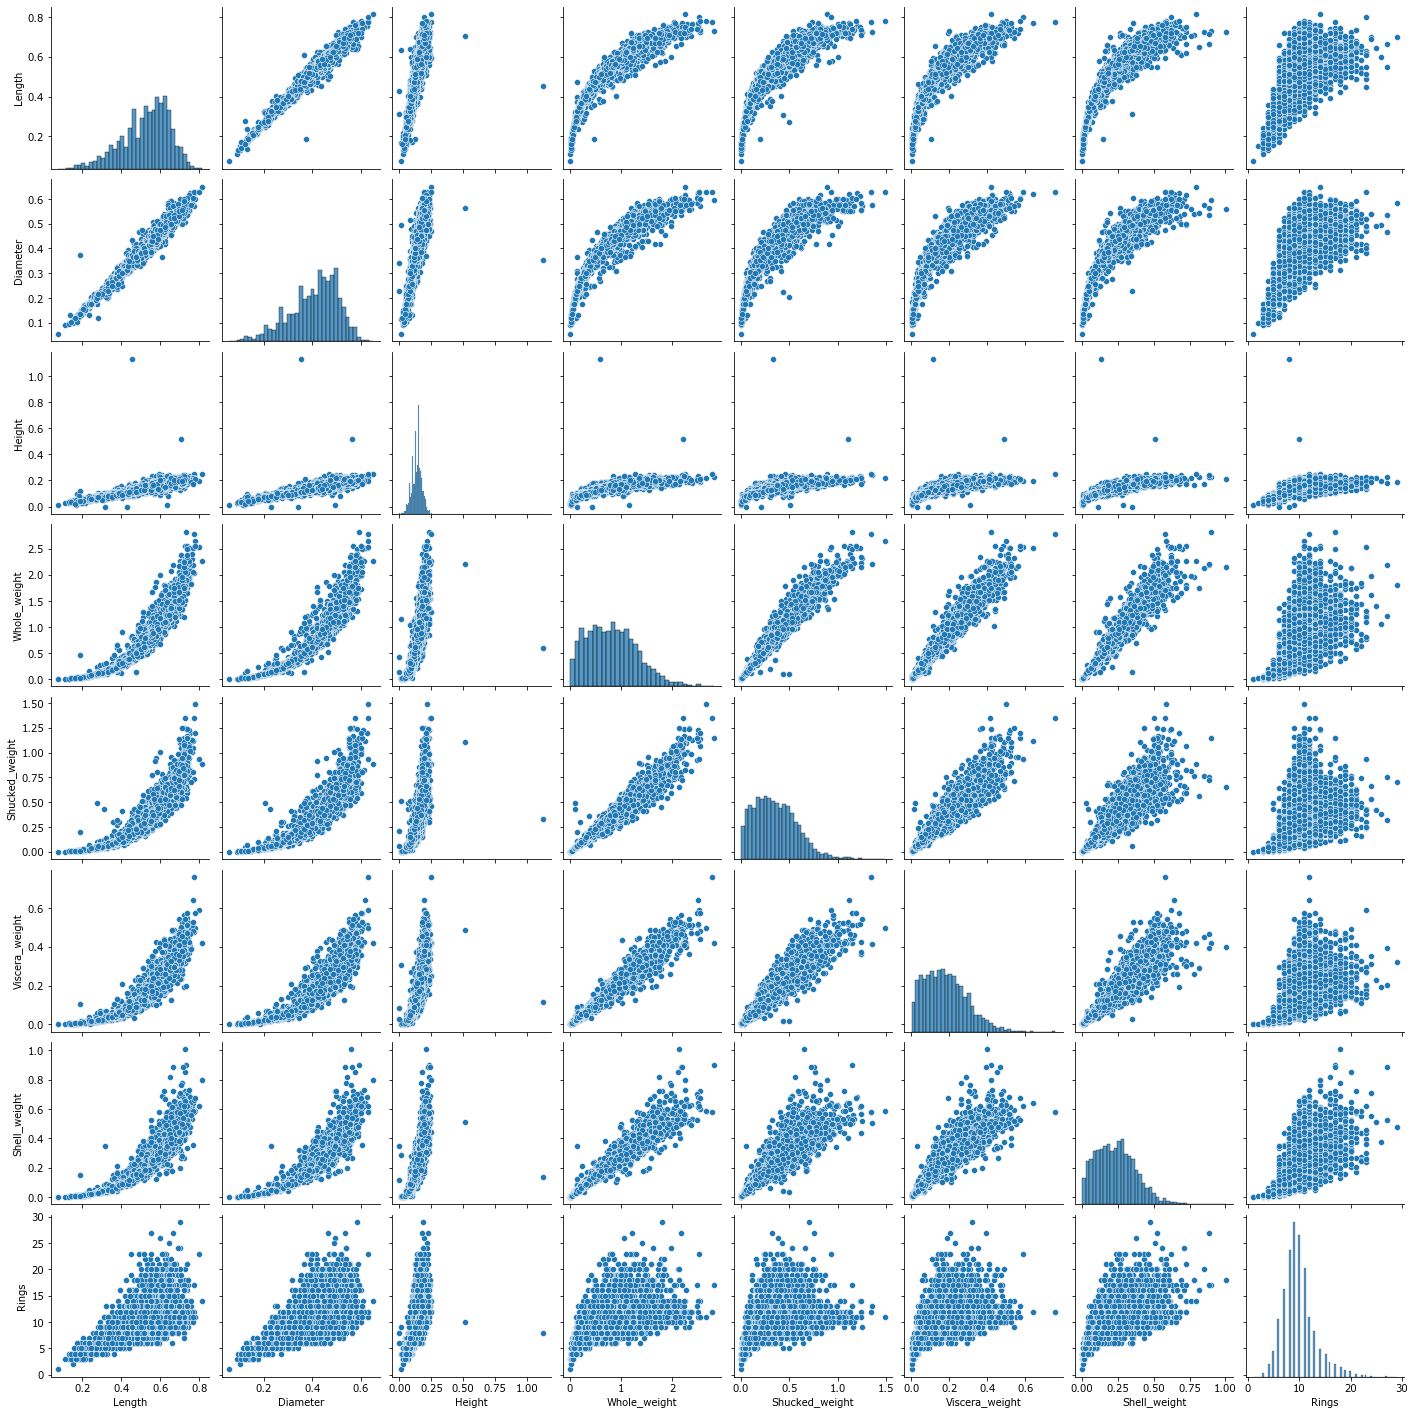

In [5]:
sns.pairplot(df)

From the pair-plot it is clear length and diameter are skewed to the left whilst the various weights and the number of rings are skewed towards the right. To make the data closer to a gaussian/normal distribution, apply exponential function to length and diameter, and apply logarithmic function to the weights and ring number.
We can also identify two outliers in the height feature and will look at these in more detail first. To confirm these outliers we will first view the top ten largest heights.

# 3. Removing Outliers

In [6]:
largest_heights = pd.DataFrame(df['Height'].nlargest(10))
largest_heights.reset_index(level=0, inplace=True)
print(largest_heights)

   index  Height
0   2051   1.130
1   1417   0.515
2   1428   0.250
3   1763   0.250
4   2179   0.250
5    277   0.240
6    307   0.240
7   1528   0.240
8   2161   0.240
9    506   0.235


In [7]:
outliers = pd.DataFrame().append(df.iloc[largest_heights['index'].iloc[0]])
outliers = outliers.append(df.iloc[largest_heights['index'].iloc[1]])
print(outliers)

      Diameter  Height  Length  Rings Sex  Shell_weight  Shucked_weight  \
2051     0.355   1.130   0.455    8.0   F        0.1335          0.3320   
1417     0.565   0.515   0.705   10.0   M        0.5120          1.1075   

      Viscera_weight  Whole_weight  
2051          0.1160         0.594  
1417          0.4865         2.210  


In [8]:
df=df.drop(df.index[[largest_heights['index'].iloc[0],largest_heights['index'].iloc[1]]])

# 4. Transforming data distribution to a more gaussian shape

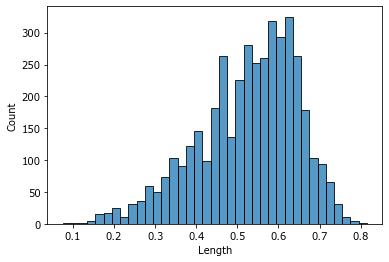

In [9]:
sns.histplot(df['Length'])

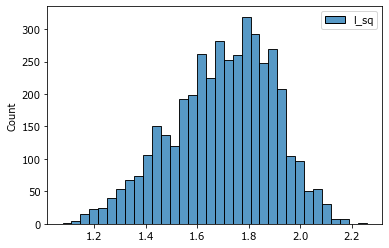

In [10]:
l_sq = pd.DataFrame(np.exp(np.array(df['Length'])),columns=['l_sq'])
sns.histplot(l_sq)

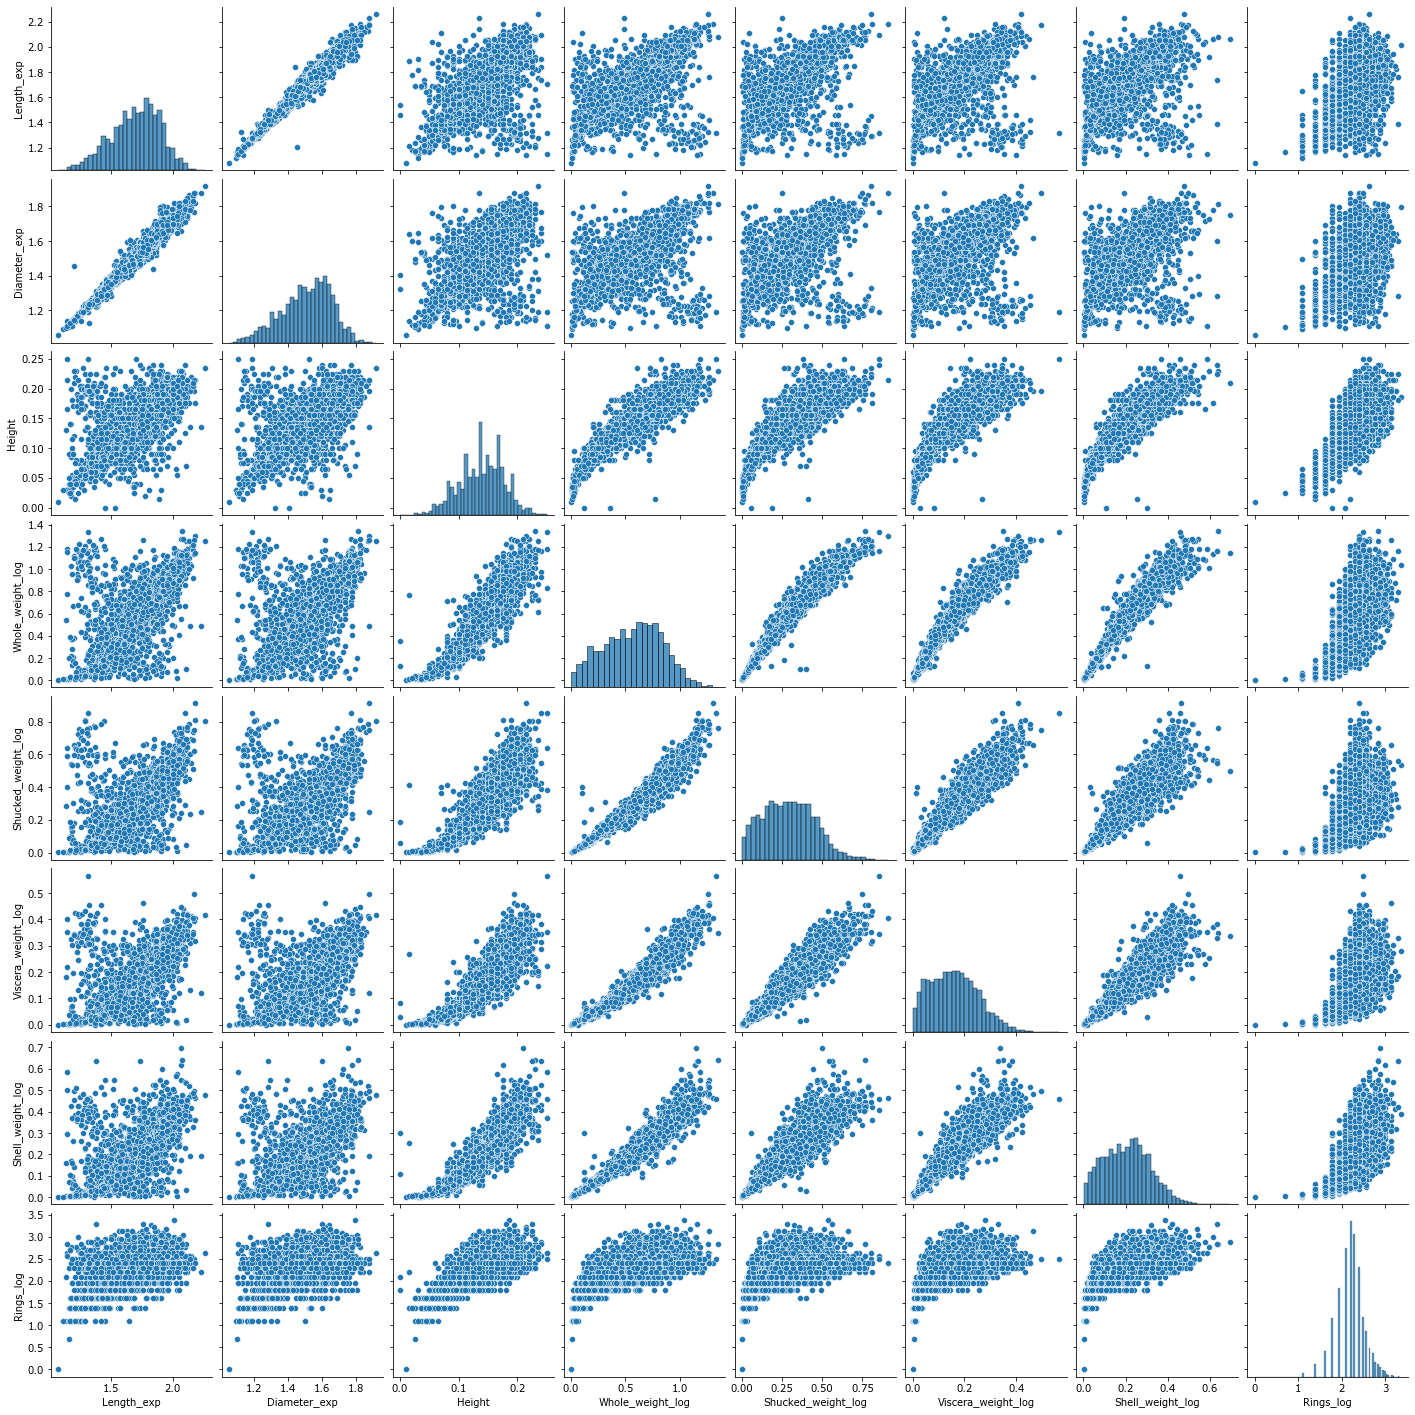

In [11]:
transformed_data = pd.DataFrame()
transformed_data['Length_exp']=np.exp(np.array(df['Length']))
transformed_data['Diameter_exp']=np.exp(np.array(df['Diameter']))
transformed_data['Height']=df['Height']
transformed_data['Whole_weight_log']=np.log1p(df['Whole_weight'])
transformed_data['Shucked_weight_log']=np.log1p(df['Shucked_weight'])
transformed_data['Viscera_weight_log']=np.log1p(df['Viscera_weight'])
transformed_data['Shell_weight_log']=np.log1p(df['Shell_weight'])
transformed_data['Rings_log']=np.log(df['Rings'])
sns.pairplot(transformed_data)

# 5. Working with non-numerical data

Use one hot encoding for the sex column so data can be used for regression.

In [12]:
df = pd.get_dummies(df)
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


# 6. Scaling Data

In [32]:
for i in df.columns:
    print("{} min:{} max:{}".format(i,df[i].min(),df[i].max())) 
    

Length min:0.0 max:1.0
Diameter min:0.0 max:1.0
Height min:0.0 max:1.0
Whole_weight min:0.0 max:1.0
Shucked_weight min:0.0 max:1.0
Viscera_weight min:0.0 max:1.0
Shell_weight min:0.0 max:1.0
Rings min:0.0 max:1.0
Sex_F min:0 max:1
Sex_I min:0 max:1
Sex_M min:0 max:1


In [30]:
for i in df.columns[:-3]:
    print(i)
    minimum = df[i].min()
    maximum = df[i].max()
    df[i] = (df[i]-df[i].min())/(maximum - minimum)
    

Length
Diameter
Height
Whole_weight
Shucked_weight
Viscera_weight
Shell_weight
Rings


In [33]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.513514,0.521008,0.38,0.181335,0.150303,0.132324,0.147982,0.500000,0,0,1
1,0.371622,0.352941,0.36,0.079157,0.066241,0.063199,0.068261,0.214286,0,0,1
2,0.614865,0.613445,0.54,0.239065,0.171822,0.185648,0.207773,0.285714,1,0,0
3,0.493243,0.521008,0.50,0.182044,0.144250,0.149440,0.152965,0.321429,0,0,1
4,0.344595,0.336134,0.32,0.071897,0.059516,0.051350,0.053313,0.214286,0,1,0
